# PART 2: Sequential Sentence Classification

In [45]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct

fatal: destination path 'pubmed-rct' already exists and is not an empty directory.


In [46]:
!ls pubmed-rct

PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [47]:
## Check what files are in the PubMed20k dataset

!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/
!ls pubmed-rct/PubMed_20k_RCT

dev.txt  test.txt  train.txt
dev.txt  test.txt  train.txt


In [48]:
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign"

In [49]:
import os

filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_signdev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_signtrain.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_signtest.txt']

In [50]:
def get_lines(filename):
  with open(filename, "r") as f:
    return f.readlines()

In [51]:
train_lines = get_lines(data_dir + "/train.txt")
train_lines[:10]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [52]:
len(train_lines)

210040

## we want to make our data like this format

```
[{"line_number": 0,
   "target": "BACKGROUND:,
   text": "Emotional eating is associated with overeating and the development of obesity .",
   "total_lines": 11 # total lines in an abstract
},
{"line_number": 1,
...continue like this here
}]
```

In [53]:
# function to preprocess text with line numbers

def preprocess_text_with_line_numbers(filename):
  """
  Returns a list of dictionaries of abstract line data.

  Takes in filename reads its contents and sorts through each line,
  extracting things like the target label, the text of the sentence number,
  total number of lines in the abstract, and the actual text of the sentence.
  """

  # get all the lines from the filename
  input_lines = get_lines(filename)
  # create an empty abstract
  abstract_lines=""
  # create an empty list of abstract
  abstract_samples = []

  # loop through each line
  for line in input_lines:
    if line.startswith("###"):
      abstract_id = line
      # reset the abstract_line if the line is abstract_id line
      abstract_lines = ""
    # checking if it is a newline/space
    elif line.isspace():
      abstract_line_split = abstract_lines.splitlines()

      # Iterate through each line in a single abstract and count them at the same time
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {}
        target_text_split = abstract_line.split("\t")
        if len(target_text_split) == 2:
          line_data["target"] = target_text_split[0]
          line_data["text"] = target_text_split[1].lower()
          line_data["line_number"] = abstract_line_number
          line_data["total_lines"] = len(abstract_line_split) - 1
          abstract_samples.append(line_data)
    else:
      abstract_lines += line
  return abstract_samples


In [54]:
# Get data from file and preprocess it

%%time
train_samples = preprocess_text_with_line_numbers(data_dir + "/train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "/dev.txt")
test_samples = preprocess_text_with_line_numbers(data_dir + "/test.txt")
len(train_samples), len(val_samples), len(test_samples)

CPU times: user 408 ms, sys: 101 ms, total: 509 ms
Wall time: 513 ms


(180040, 30212, 30135)

In [55]:
train_samples[:12]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [56]:
import pandas as pd

try_data1 = {
        "name": ["Manoj", "Raju"],
        "age": [22,23]
    }

# or

try2 = [
    {
        "name": "Manoj",
        "age": 22
    },
    {
        "name": "Raju",
        "age": 23
    }
]

dataf1 = pd.DataFrame(try_data1)
dataf2 = pd.DataFrame(try2)

print(dataf1)
print("\n")
print(dataf2)

    name  age
0  Manoj   22
1   Raju   23


    name  age
0  Manoj   22
1   Raju   23


In [57]:
# Visualizing

import pandas as pd

train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head(12)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [58]:
train_df.target.value_counts()

target
METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: count, dtype: int64

In [59]:
# convert abstract text lines into lists

train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [60]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

## One Hot Encoder

In [61]:
# One Hot Encode labels

from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))
train_labels_one_hot.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(180040, 5)

## Label Encoder

In [62]:
# Extract labels and encode them into integers

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

train_labels_encoded[:12]

array([3, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 1])

In [63]:
num_classes = len(label_encoder.classes_)
num_classes

5

## Helper function
# Download helper function script

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

In [64]:
# Download helper function script

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-07-13 17:08:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2024-07-13 17:08:34 (12.9 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [65]:
from helper_functions import calculate_results

## TFHUB Pretrained token embedding

In [66]:
# download pretrained Tensorflow use

import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer(
    "https://tfhub.dev/google/universal-sentence-encoder/4",
    trainable=False, # dont train further in our architecture
    name="universal_sentence_encoder"
)

## Character level tokenizer

In [67]:
train_sentences[:5]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .']

In [68]:
def split_chars(text):
  return " ".join(list(text))

In [69]:
" ".join(list("hello"))

'h e l l o'

In [70]:
"".join(list("Hello"))

'Hello'

In [71]:
"+".join(list("Hello"))

'H+e+l+l+o'

In [72]:
list("hello")

['h', 'e', 'l', 'l', 'o']

In [73]:
print(split_chars("Hello"))

H e l l o


In [74]:
split_chars(train_sentences[0])

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [75]:
# Sequences splitting sequence-level data into character-level data

train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]
print(train_chars[0])

t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .


In [76]:
len(train_chars), len(val_chars), len(test_chars)

(180040, 30212, 30135)

In [77]:
import random

random_sentence = random.choice(train_sentences)

len(random_sentence), len(random_sentence.split())

(76, 15)

In [78]:
import numpy as np

chars_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(chars_lens)
mean_char_len

149.3662574983337

In [79]:
# Find what character length covers 95% of sequences

output_seq_char_len = int(np.percentile(chars_lens, 95))
output_seq_char_len

290

In [80]:
# Get all keyboard characters

import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [81]:
# Creating character-level token vectorizer instance
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

NUM_CHAR_TOKENS = len(alphabet) + 2

char_vectorizer = TextVectorization(
    max_tokens=NUM_CHAR_TOKENS, # all characters len 25 26 stg
    output_sequence_length=output_seq_char_len, # 290 (95% of data)
    standardize="lower_and_strip_punctuation",
    name="char_vectorizer"
)

In [82]:
char_vectorizer.adapt(train_chars)

In [83]:
# get vocab

char_vocab = char_vectorizer.get_vocabulary()
char_vocab[:10]

['', '[UNK]', 'e', 't', 'i', 'a', 'n', 'o', 'r', 's']

In [84]:
len(char_vocab) # all character vocabulary

28

In [85]:
# Test out character vectorizer
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n{random_train_chars}")
print(f"\nLength of random_train_chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
p a t i e n t s   i n   t h e   f i r s t   g r o u p   u n d e r w e n t   k a r y d a k i s   p r o c e d u r e   ,   w h e r e a s   e h s i   w a s   t h e   s u r g i c a l   m a n a g e m e n t   i n   t h e   s e c o n d   g r o u p   .

Length of random_train_chars: 103

Vectorized chars:
[[14  5  3  4  2  6  3  9  4  6  3 13  2 17  4  8  9  3 18  8  7 16 14 16
   6 10  2  8 20  2  6  3 23  5  8 19 10  5 23  4  9 14  8  7 11  2 10 16
   8  2 20 13  2  8  2  5  9  2 13  9  4 20  5  9  3 13  2  9 16  8 18  4
  11  5 12 15  5  6  5 18  2 15  2  6  3  4  6  3 13  2  9  2 11  7  6 10
  18  8  7 16 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0 

## Char Embedding

In [86]:
from tensorflow.keras import layers

char_embed = layers.Embedding(
    input_dim=len(char_vocab), # number of different characters
    output_dim=25, # according to the med pub paper
    mask_zero=True,
    name="char_embed"
)

In [87]:
test_vectorizer_char = char_vectorizer(["h e l l o"])
test_vectorizer_char

<tf.Tensor: shape=(1, 290), dtype=int64, numpy=
array([[13,  2, 12, 12,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0, 

In [88]:
test_embed_char = char_embed([test_vectorizer_char][0])
test_embed_char

<tf.Tensor: shape=(1, 290, 25), dtype=float32, numpy=
array([[[-0.03019143,  0.00972747, -0.01803216, ...,  0.00251024,
          0.01397854,  0.00708834],
        [-0.03577896, -0.0130145 , -0.01125252, ...,  0.02455405,
         -0.04696846, -0.04014298],
        [-0.03894054,  0.01096744, -0.03633391, ...,  0.02245028,
          0.01481899, -0.02727168],
        ...,
        [ 0.01140531, -0.02130474, -0.04330859, ...,  0.02672427,
          0.04262631, -0.00529445],
        [ 0.01140531, -0.02130474, -0.04330859, ...,  0.02672427,
          0.04262631, -0.00529445],
        [ 0.01140531, -0.02130474, -0.04330859, ...,  0.02672427,
          0.04262631, -0.00529445]]], dtype=float32)>

# MODEL 4: Combining pretrained token embeddings + characters

1. Create a token-level embedding
2. Create a character-level model
3. Combine 1 & 2 with a concatenate (`layers.Concatenate`) in tensorflow
4. Build output layers on top of 3 similar to original paper
5. Construct a model which takes token and character-level sequences as input and produces sequence label probabilites as output

In [89]:
# 1. Setup token inputs/model
from tensorflow.keras import layers
import tensorflow as tf

token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs, outputs=token_output)

In [90]:
# 2. Setup char inputs/model

char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
# 2ko bi lstm maa 48 huncha double vayera # bi-LSTM
char_model = tf.keras.Model(inputs=char_inputs, outputs=char_bi_lstm)

In [91]:
# 3. Concatenate token and char inputs ( create hybrid token embedding )

token_char_concat = layers.Concatenate(name="token_char_hybrid")(
    [token_model.output,
    char_model.output]
)

In [92]:
# 4. Create output layers adding in dropout layers

combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(128, activation="relu")(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(5, activation="softmax")(final_dropout)

In [93]:
# 5. Construct a model combining all these

model_4 = tf.keras.Model(
    inputs = [token_model.input, char_model.input],
    outputs = output_layer,
    name="model_4_token_and_char_embeddings"
)

In [94]:
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_input[0][0]']          
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978 

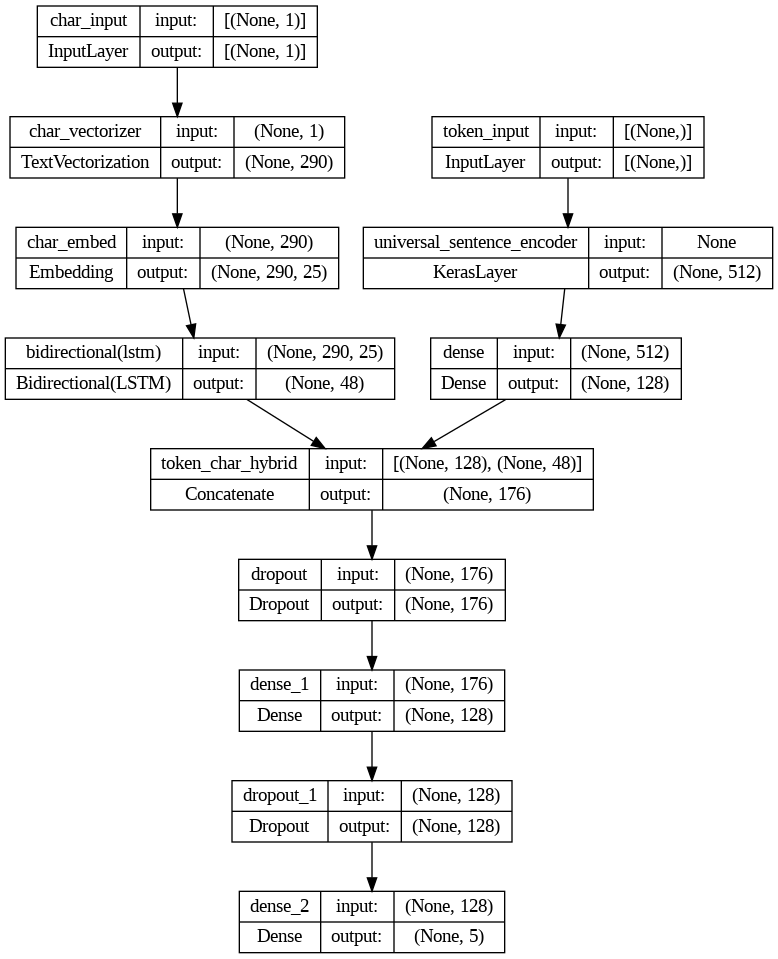

In [95]:
# Plot hybrid token and character model

from keras.utils import plot_model
plot_model(model_4, show_shapes = True)

In [96]:
model_4.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

## Creating efficient data pipeline: combining token and character data in Tf.data Dataset

In [97]:
# combine chars and token into a dataset

train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_dataset = tf.data.Dataset.zip(
    (train_char_token_data, train_char_token_labels)
)

# zip here combines two different existing tf.data Dataset


In [98]:
# Prefetch and batch train data

train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [99]:
# Repeat for validation data

val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip(
    (val_char_token_data, val_char_token_labels)
    )
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [100]:
# check our train char and val token embedding dataset

train_char_token_dataset, val_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

`order of these data should be as same as the model input order`

In [101]:
model_4_history = model_4.fit(
    train_char_token_dataset,
    steps_per_epoch = 0.1 * len(train_char_token_dataset),
    epochs = 5,
    validation_data = val_char_token_dataset,
    validation_steps = 0.1 * len(val_char_token_dataset)
)

Epoch 1/5
562/562 [==============================] - 48s 56ms/step - loss: 0.9804 - accuracy: 0.6099 - val_loss: 0.7948 - val_accuracy: 0.6905
Epoch 2/5
562/562 [==============================] - 32s 57ms/step - loss: 0.8026 - accuracy: 0.6899 - val_loss: 0.7223 - val_accuracy: 0.7201
Epoch 3/5
562/562 [==============================] - 24s 42ms/step - loss: 0.7773 - accuracy: 0.6993 - val_loss: 0.7001 - val_accuracy: 0.7280
Epoch 4/5
562/562 [==============================] - 27s 48ms/step - loss: 0.7440 - accuracy: 0.7173 - val_loss: 0.6721 - val_accuracy: 0.7437
Epoch 5/5
562/562 [==============================] - 25s 45ms/step - loss: 0.7570 - accuracy: 0.7138 - val_loss: 0.6639 - val_accuracy: 0.7474


In [102]:
model_4_pred_probs = model_4.predict(val_char_token_dataset)
# in the future if we want to make prediction using model 4 we need to format tha dataset as we do while training
model_4_pred_probs

945/945 [==============================] - 22s 21ms/step


array([[5.2287787e-01, 2.6260960e-01, 5.8134450e-03, 2.0267420e-01,
        6.0248859e-03],
       [4.4075724e-01, 4.2193457e-01, 5.7383426e-03, 1.2982312e-01,
        1.7467089e-03],
       [3.0276227e-01, 4.9214780e-02, 5.6934319e-02, 5.7326794e-01,
        1.7820640e-02],
       ...,
       [3.0814740e-04, 3.1152014e-03, 5.8696833e-02, 7.3502764e-05,
        9.3780631e-01],
       [8.1400629e-03, 4.3782312e-02, 4.1341481e-01, 3.3531971e-03,
        5.3130960e-01],
       [1.7961368e-01, 5.0164706e-01, 2.2780183e-01, 1.4705769e-02,
        7.6231636e-02]], dtype=float32)

In [103]:
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [149]:
model_4_results = calculate_results(model_4_preds, val_labels_encoded)

# MODEL 5: With Positional embeddings
Feature engineering the position of background, objective, method and conclusion.

Engineered features need to be available at test time.

In our case line numbers and total times are available.

In [107]:
train_df

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
...,...,...,...,...
180035,RESULTS,for the absolute change in percent atheroma vo...,7,11
180036,RESULTS,"for pav , a significantly greater percentage o...",8,11
180037,RESULTS,both strategies had acceptable side effect pro...,9,11
180038,CONCLUSIONS,"compared with standard statin monotherapy , th...",10,11


## Create Positional Embedding

In [108]:
## How many different lines numbers are there

train_df["line_number"].value_counts()

line_number
0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: count, dtype: int64

In [109]:
train_df["total_lines"].value_counts()

total_lines
11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

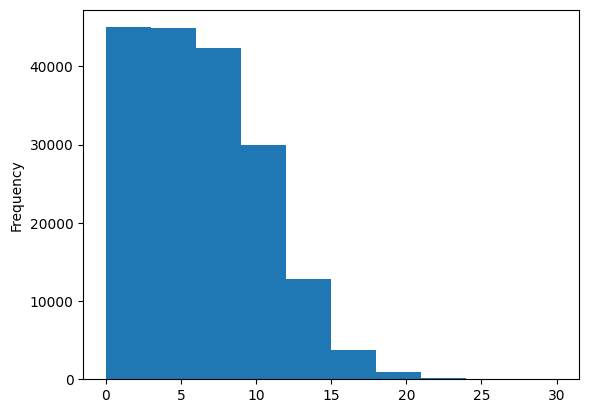

In [110]:
train_df.line_number.plot.hist()

So looking at above histogram if we cutoff our line at 15 and only one hot at 15 we will cover a lot of items

In [111]:
# using tensorflow to create one hot encoded tensors of our line number column

train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth=15)

for above 15 all will be 000000000000000

In [112]:
train_line_numbers_one_hot[:5], train_line_numbers_one_hot.shape

(<tf.Tensor: shape=(5, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=float32)>,
 TensorShape([180040, 15]))

In [113]:
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth=15)

In [114]:
## Encoding one hot for total line

train_df["total_lines"].value_counts()

total_lines
11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

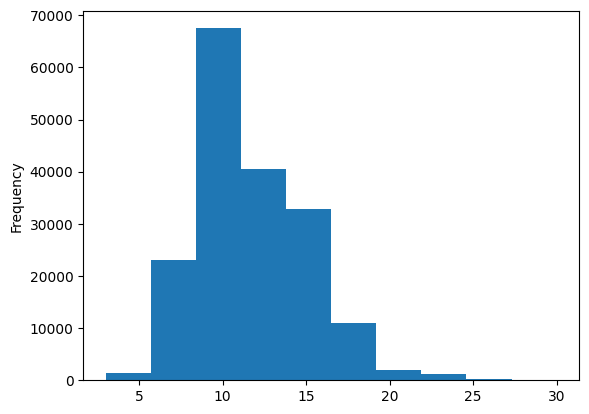

In [116]:
train_df.total_lines.plot.hist()

In [118]:
## Check the coverage of total lines

np.percentile(train_df.total_lines, 98)

20.0

so if we choose 20 to onehot we will cover 98 percent of the data

In [119]:
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
train_total_lines_one_hot[:5]

<tf.Tensor: shape=(5, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [120]:
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)

## Building the model

1. Create a token-level model
2. Create a character-level model
3. Create a model for the "line_number" feature
4. Create a model for the "total_lines" feature
5. Combine the outputs of 1 and 2 using tf.keras.layers.Concatenate
6. Combine the outputs of 3 4 and 5
7. Create an output layer to accept the tribrid embedding and output label probabilities
8. Combine the inputs of 1 2 3 4 and the outputs of 7 into a tf.keras.Model

In [121]:
# 1. Token Inputs

token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_inputs")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs, outputs=token_outputs)

In [122]:
# 2. Char inputs

char_inputs = layers.Input(shape=(1, ), dtype="string", name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(
    inputs=char_inputs,
    outputs=char_bi_lstm
)

In [125]:
train_line_numbers_one_hot[0].shape, train_line_numbers_one_hot.dtype

(TensorShape([15]), tf.float32)

In [126]:
# 3. Line number model

line_number_inputs = layers.Input(shape=(15, ), dtype=tf.float32, name="line_number_inputs")
x = layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(
    inputs = line_number_inputs,
    outputs = x
)

In [127]:
# 4. Total lines model

total_lines_inputs = layers.Input(shape=(20, ), dtype=tf.float32, name="total_lines_inputs")
x = layers.Dense(32, activation="relu")(total_lines_inputs)
total_lines_model = tf.keras.Model(
    inputs = total_lines_inputs,
    outputs = x
)

In [131]:
# 5. Combine token and char embeddings into a hybrid embedding

combined_embedding = tf.keras.layers.Concatenate(name="char_token_hybrid_embedding")(
    [token_model.output, char_model.output]
)

x = layers.Dense(256, activation="relu")(combined_embedding)
x = layers.Dropout(0.5)(x)

In [132]:
# 6. Combine positional embeddings with combined tokens and char embeddings

tribrid_embeddings = layers.Concatenate(name="char_token_positional_embedding")(
    [line_number_model.output, total_lines_model.output, x]
)

In [133]:
# 7. Create output layer

output_layer = layers.Dense(5, activation="softmax", name="output_layer")(tribrid_embeddings)

In [136]:
# 8. All together

model_5 = tf.keras.Model(
    inputs=[line_number_model.input,
            total_lines_model.input,
            token_model.input,
            char_model.input],
    outputs=[output_layer],
    name="tribrid_embedding_model"
)

In [137]:
model_5.summary()

Model: "tribrid_embedding_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_inputs (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 token_inputs (InputLayer)   [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_inputs[0][0]']         
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978   ['token_

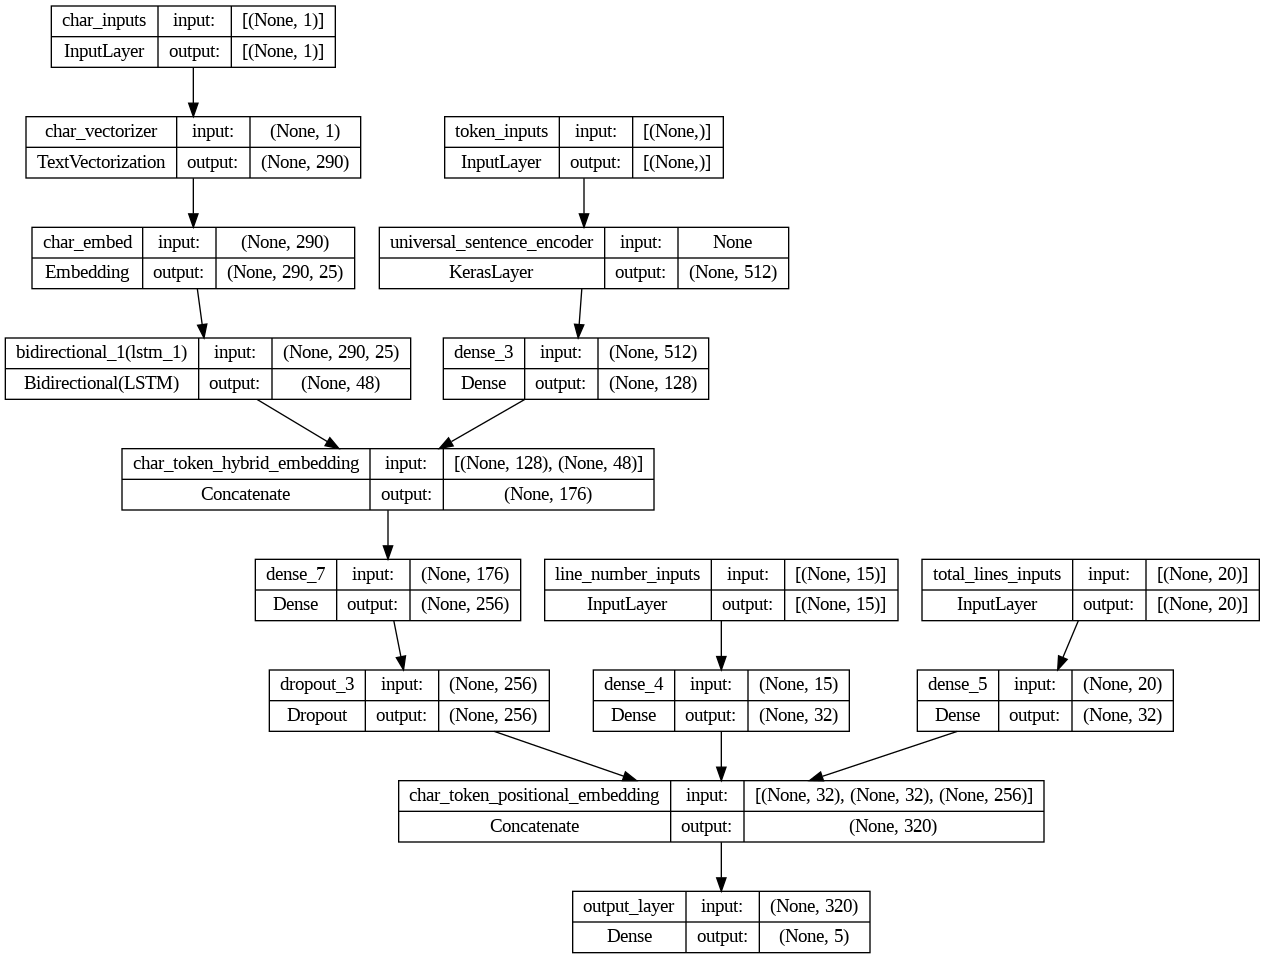

In [138]:
# visualize the model

from keras.utils import plot_model
plot_model(model_5, show_shapes=True)

`**Label Smoothing**`

* Helps to prevent overfitting
* If our model gets too confident on a single class it may get stuck on that class and not consider other classes...


What label smoothing does is it assigns some of the value from the highest pred prob to other classes in turn hopefully improving generalization.

`[0.0 0.0 0.0 0.0 1.0]`
 After label smoothing:
 `[0.01, 0.01, 0.01, 0.01, 0.96]`

In [139]:
model_5.compile(
    # label smoothing helps to prevent overfitting
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

## Prepare data Pipeline: tf.data Dataset

Here we got four inputs of data

In [140]:
# Create training and validation dataset with all four kinds of data

# the order of the data should match the model architecture so keep that in mind hai
train_char_token_pos_data = tf.data.Dataset.from_tensor_slices((
    train_line_numbers_one_hot,
    train_total_lines_one_hot,
    train_sentences,
    train_chars
))

train_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(
    train_labels_one_hot
)

train_char_token_pos_dataset = tf.data.Dataset.zip(
    (train_char_token_pos_data, train_char_token_pos_labels)
)
train_char_token_pos_dataset = train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [141]:
# for the validation dataset

val_char_token_pos_data = tf.data.Dataset.from_tensor_slices((
    val_line_numbers_one_hot,
    val_total_lines_one_hot,
    val_sentences,
    val_chars
))

val_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(
    (val_labels_one_hot)
)
val_char_token_pos_dataset = tf.data.Dataset.zip(
    (val_char_token_pos_data, val_char_token_pos_labels)
).batch(32).prefetch(tf.data.AUTOTUNE)

In [142]:
# check shapes

train_char_token_pos_dataset, val_char_token_pos_dataset

# agaadi define gareko data ko shape haru sequential order maa tala xa hai

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

## Fitting the model

In [143]:
model_5_history = model_5.fit(
    train_char_token_pos_dataset,
    steps_per_epoch = 0.1 * len(train_char_token_pos_dataset),
    epochs = 3,
    validation_data = val_char_token_pos_dataset,
    validation_steps = 0.1 * len(val_char_token_pos_dataset)
)

Epoch 1/3
562/562 [==============================] - 40s 53ms/step - loss: 1.1024 - accuracy: 0.7181 - val_loss: 0.9902 - val_accuracy: 0.8010
Epoch 2/3
562/562 [==============================] - 38s 67ms/step - loss: 0.9678 - accuracy: 0.8155 - val_loss: 0.9513 - val_accuracy: 0.8263
Epoch 3/3
562/562 [==============================] - 28s 49ms/step - loss: 0.9504 - accuracy: 0.8247 - val_loss: 0.9383 - val_accuracy: 0.8319


In [144]:
model_5_pred_probs = model_5.predict(val_char_token_pos_dataset, verbose=1)
model_5_pred_probs

945/945 [==============================] - 24s 22ms/step


array([[0.4776992 , 0.09743485, 0.01139316, 0.39351103, 0.01996172],
       [0.50623006, 0.11319663, 0.04761997, 0.32163432, 0.01131902],
       [0.26750395, 0.11413882, 0.14803052, 0.39696482, 0.07336195],
       ...,
       [0.03305178, 0.1212065 , 0.0493648 , 0.03208714, 0.7642898 ],
       [0.02902918, 0.30577826, 0.09584878, 0.02606798, 0.5432758 ],
       [0.21535817, 0.58177096, 0.08884853, 0.04534056, 0.06868173]],
      dtype=float32)

In [145]:
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [148]:
model_5_results = calculate_results(
    y_pred=model_5_preds,
    y_true=val_labels_encoded
)
model_5_results

{'accuracy': 83.25168807096517,
 'precision': 0.8311474625981631,
 'recall': 0.8325168807096518,
 'f1': 0.8314362175334103}

# Compare Model Results

In [150]:
model_results = {
    "model_4": model_4_results,
    "model_5": model_5_results
}
model_results = pd.DataFrame(model_results)
model_results

,model_4,model_5
accuracy,74.453859,83.251688
precision,0.764135,0.831147
recall,0.744539,0.832517
f1,0.749740,0.831436


In [158]:
all_model_results = model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
model_4,74.453859,0.764135,0.744539,0.749740
model_5,83.251688,0.831147,0.832517,0.831436


In [159]:
all_model_results["accuracy"] = all_model_results["accuracy"]/100

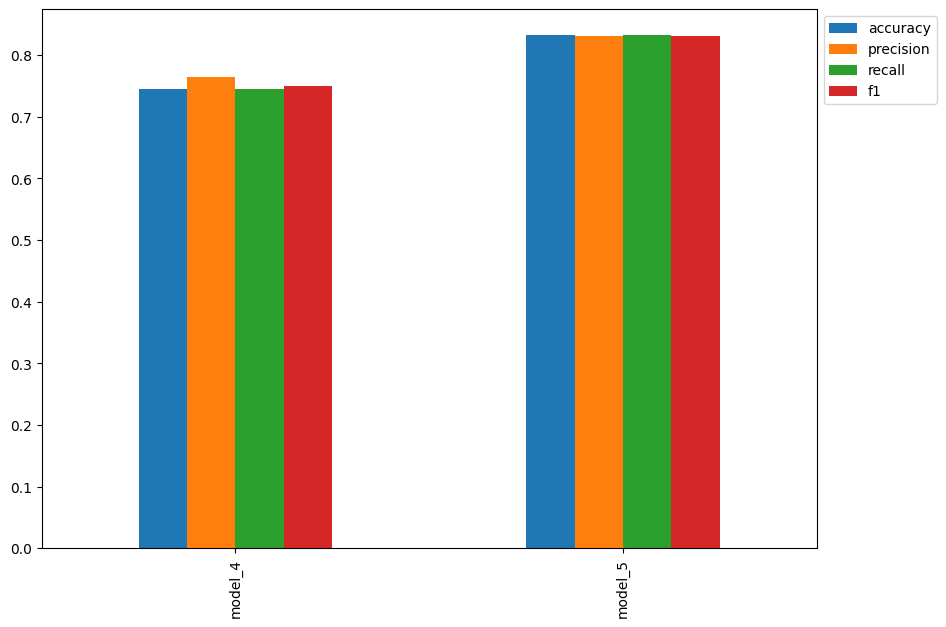

In [160]:
# plot and compare all model results

all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0))

<Axes: >

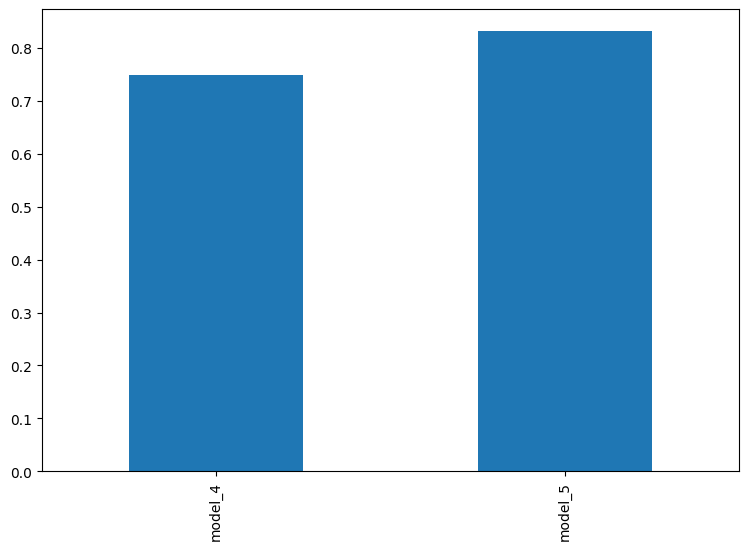

In [162]:
all_model_results.sort_values("f1", ascending=True)["f1"].plot(kind="bar", figsize=(9,6))

# Saving, loading and testing our model

```
 The key difference between high-level .keras/HDF5 formats and the low-level SavedModel format is that the .keras/HDF5 formats uses object configs to save the model architecture, while SavedModel saves the execution graph. Thus, SavedModels are able to save custom objects like subclassed models and custom layers without requiring the original code. However, debugging low-level SavedModels can be more difficult as a result, and we recommend using the high-level .keras format instead due to its name-based, Keras-native nature.
 ```

In [163]:
# saving model

# format: saved model format (default)
model_5.save("sklit_tribrid_model")

# format: another format
# model_5.save("model_5.h5")

In [164]:
# loading the model

loaded_model = tf.keras.models.load_model("sklit_tribrid_model")

In [165]:
loaded_model_prediction = loaded_model.predict(val_char_token_pos_dataset)
loaded_model_prediction = tf.argmax(loaded_model_prediction, axis=1)
loaded_model_prediction[:10]

945/945 [==============================] - 26s 24ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [166]:
loaded_model_results = calculate_results(
    y_pred=loaded_model_prediction,
    y_true=val_labels_encoded
)
loaded_model_results

{'accuracy': 83.25168807096517,
 'precision': 0.8311474625981631,
 'recall': 0.8325168807096518,
 'f1': 0.8314362175334103}

In [167]:
loaded_model.summary()

Model: "tribrid_embedding_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_inputs (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 token_inputs (InputLayer)   [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_inputs[0][0]']         
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978   ['token_

# Testing our model

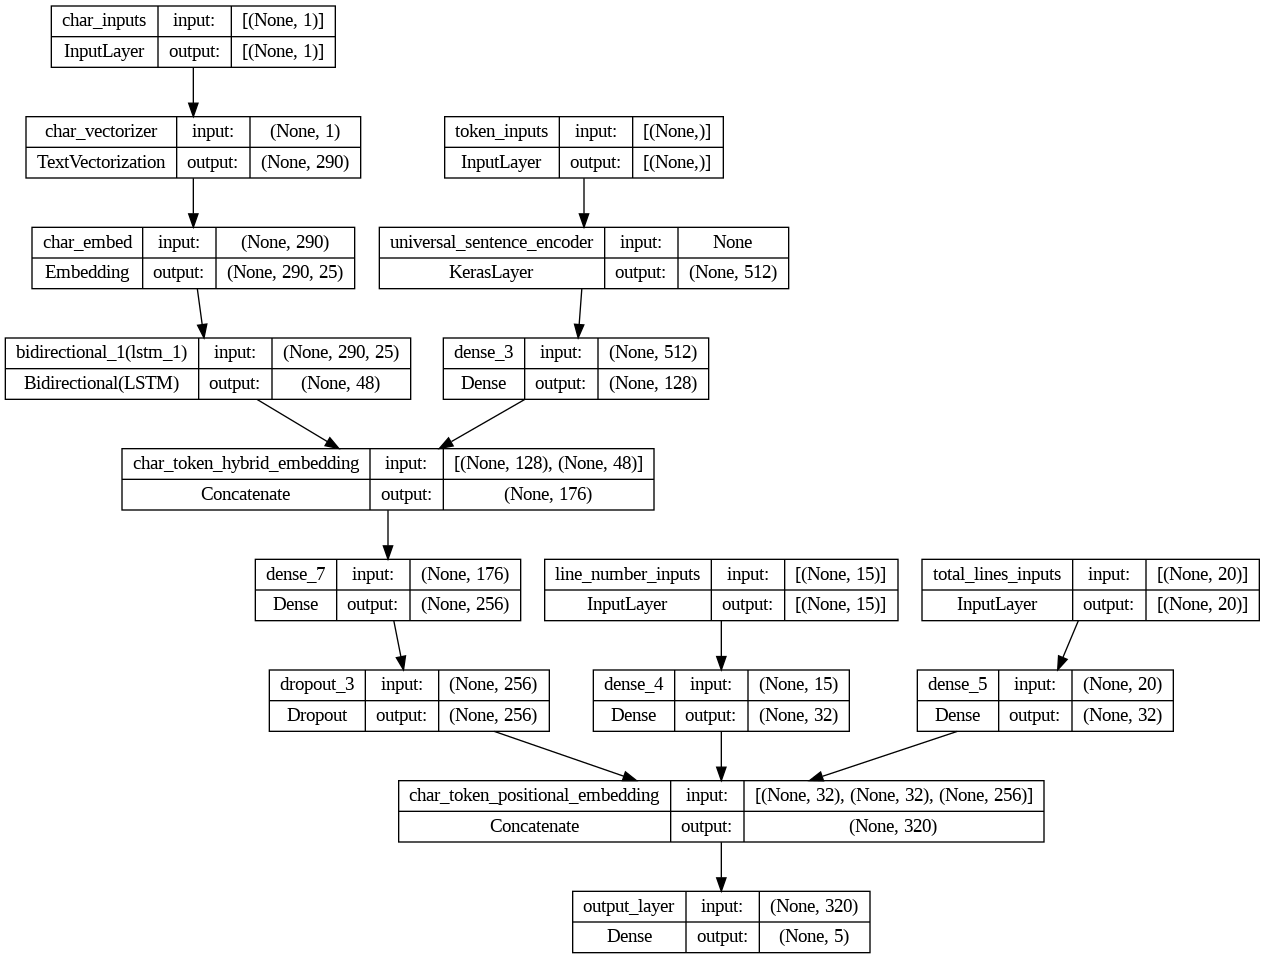

In [189]:
plot_model(model_5, show_shapes=True)

In [169]:
abstract = "Sarcopenia is an age-related disease characterized by loss of muscle strength, mass and performance. Malnutrition contributes to sarcopenia pathogenesis. The aim of this systematic review is to analyze existing evidence on the efficacy of nutritional supplementation on muscle and mitochondrial health among sarcopenic or malnourished older adults. We included randomized controlled trials (RCTs) assessing the effect of branched-chain amino acid (BCAA), vitamin D and/or omega-3 polyunsaturated fatty acid (PUFA) on muscle mass, strength and performance and/or on mitochondrial activity and redox state in older sarcopenic and/or malnourished adults. The literature search was on MEDLINE, Embase and Cochrane Central, restricted to articles published in the last 10 years (2012-2022). Twelve RCTs with a total of 1337 subjects were included. BCAA with vitamin D significantly ameliorates appendicular muscle mass (4 RCTs), hand grip strength (4 RCTs), gait speed (3 RCTs), short physical performance battery (3 RCTs) or chair stand test (3 RCTs) among six out of nine RCTs. BCAA alone (2 RCTs) or PUFA (1 RCT) were not effective in improving muscle health. Mitochondrial function was significantly improved by the administration of BCAA alone (1 RCT) or in association with vitamin D (1 RCT). In conclusion, BCAA in association with vitamin D may be useful in the treatment of sarcopenia and boost mitochondrial bioenergetic and redox activity. PROSPERO CRD42022332288."

In [173]:
abstract_sentences = abstract.split(".")

In [175]:
abstract_sentences

['Sarcopenia is an age-related disease characterized by loss of muscle strength, mass and performance',
 ' Malnutrition contributes to sarcopenia pathogenesis',
 ' The aim of this systematic review is to analyze existing evidence on the efficacy of nutritional supplementation on muscle and mitochondrial health among sarcopenic or malnourished older adults',
 ' We included randomized controlled trials (RCTs) assessing the effect of branched-chain amino acid (BCAA), vitamin D and/or omega-3 polyunsaturated fatty acid (PUFA) on muscle mass, strength and performance and/or on mitochondrial activity and redox state in older sarcopenic and/or malnourished adults',
 ' The literature search was on MEDLINE, Embase and Cochrane Central, restricted to articles published in the last 10 years (2012-2022)',
 ' Twelve RCTs with a total of 1337 subjects were included',
 ' BCAA with vitamin D significantly ameliorates appendicular muscle mass (4 RCTs), hand grip strength (4 RCTs), gait speed (3 RCTs), 

In [174]:
len(abstract_sentences)

12

In [178]:
str("hello")

'hello'

In [179]:
total_lines_in_sample = len(abstract_sentences)

sample_lines = []
for i, line in enumerate(abstract_sentences):
  sample_dict = {}
  sample_dict["line_number"] = i
  sample_dict["total_lines"] = total_lines_in_sample - 1
  sample_dict["text"] = str(line)
  sample_lines.append(sample_dict)

sample_lines

[{'line_number': 0,
  'total_lines': 11,
  'text': 'Sarcopenia is an age-related disease characterized by loss of muscle strength, mass and performance'},
 {'line_number': 1,
  'total_lines': 11,
  'text': ' Malnutrition contributes to sarcopenia pathogenesis'},
 {'line_number': 2,
  'total_lines': 11,
  'text': ' The aim of this systematic review is to analyze existing evidence on the efficacy of nutritional supplementation on muscle and mitochondrial health among sarcopenic or malnourished older adults'},
 {'line_number': 3,
  'total_lines': 11,
  'text': ' We included randomized controlled trials (RCTs) assessing the effect of branched-chain amino acid (BCAA), vitamin D and/or omega-3 polyunsaturated fatty acid (PUFA) on muscle mass, strength and performance and/or on mitochondrial activity and redox state in older sarcopenic and/or malnourished adults'},
 {'line_number': 4,
  'total_lines': 11,
  'text': ' The literature search was on MEDLINE, Embase and Cochrane Central, restricte

In [180]:
test_abstract_line_numbers = [line["line_number"] for line in sample_lines]
test_abstract_line_numbers

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [181]:
# one hot encode the line numbers

test_abstract_line_numbers_one_hot = tf.one_hot(test_abstract_line_numbers, depth=15)
test_abstract_line_numbers_one_hot

<tf.Tensor: shape=(12, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]],
      dtype=float32)>

In [182]:
total_abstract_lines = [line["total_lines"] for line in sample_lines]

In [183]:
total_abstract_lines

[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

In [184]:
# one hot encode the total abstract lines

total_abstract_lines = tf.one_hot(total_abstract_lines, depth=20)
total_abstract_lines

<tf.Tensor: shape=(12, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
     

In [185]:
# split the abstract lines into characters

def split_characters(sentence):
  return " ".join(list(sentence))

split_characters(abstract_sentences[0])

'S a r c o p e n i a   i s   a n   a g e - r e l a t e d   d i s e a s e   c h a r a c t e r i z e d   b y   l o s s   o f   m u s c l e   s t r e n g t h ,   m a s s   a n d   p e r f o r m a n c e'

In [187]:
abstract_characters = [split_characters(sentence) for sentence in abstract_sentences]
abstract_characters[:2]

['S a r c o p e n i a   i s   a n   a g e - r e l a t e d   d i s e a s e   c h a r a c t e r i z e d   b y   l o s s   o f   m u s c l e   s t r e n g t h ,   m a s s   a n d   p e r f o r m a n c e',
 '  M a l n u t r i t i o n   c o n t r i b u t e s   t o   s a r c o p e n i a   p a t h o g e n e s i s']

In [190]:
# now our data is ready as our model wanted we can predict

test_abstract_pred_probs = loaded_model.predict(
    x=(
        test_abstract_line_numbers_one_hot,
        total_abstract_lines,
        tf.constant(abstract_sentences),
        tf.constant(abstract_characters)
        )
)

1/1 [==============================] - 3s 3s/step


In [191]:
test_abstract_pred_probs

array([[0.51872844, 0.03361973, 0.05350274, 0.37075678, 0.02339229],
       [0.6092017 , 0.06398144, 0.08316912, 0.23427749, 0.00937021],
       [0.381749  , 0.12714179, 0.05145317, 0.4303168 , 0.00933926],
       [0.12617236, 0.09431324, 0.57637715, 0.13925382, 0.06388346],
       [0.18403076, 0.12800437, 0.35488808, 0.11105355, 0.22202326],
       [0.02552776, 0.03027121, 0.34089944, 0.02932242, 0.5739792 ],
       [0.06798523, 0.21929559, 0.28427777, 0.06746946, 0.36097193],
       [0.10610415, 0.5598898 , 0.08448225, 0.07334655, 0.17617719],
       [0.05981353, 0.44975215, 0.07853632, 0.0586901 , 0.35320798],
       [0.06001505, 0.7664899 , 0.0218951 , 0.05488757, 0.09671232],
       [0.64348775, 0.13827422, 0.06204499, 0.07406073, 0.08213229],
       [0.05606369, 0.47770458, 0.23633341, 0.04572173, 0.18417667]],
      dtype=float32)

In [193]:
test_abstract_preds = tf.argmax(test_abstract_pred_probs, axis=1)
test_abstract_preds

<tf.Tensor: shape=(12,), dtype=int64, numpy=array([0, 0, 3, 2, 2, 4, 4, 1, 1, 1, 0, 1])>

In [195]:
label_encoder.classes_

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

In [196]:
test_abstract_pred_classes = [label_encoder.classes_[i] for i in test_abstract_preds]
test_abstract_pred_classes

['BACKGROUND',
 'BACKGROUND',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'CONCLUSIONS']

In [198]:
abstract

'Sarcopenia is an age-related disease characterized by loss of muscle strength, mass and performance. Malnutrition contributes to sarcopenia pathogenesis. The aim of this systematic review is to analyze existing evidence on the efficacy of nutritional supplementation on muscle and mitochondrial health among sarcopenic or malnourished older adults. We included randomized controlled trials (RCTs) assessing the effect of branched-chain amino acid (BCAA), vitamin D and/or omega-3 polyunsaturated fatty acid (PUFA) on muscle mass, strength and performance and/or on mitochondrial activity and redox state in older sarcopenic and/or malnourished adults. The literature search was on MEDLINE, Embase and Cochrane Central, restricted to articles published in the last 10 years (2012-2022). Twelve RCTs with a total of 1337 subjects were included. BCAA with vitamin D significantly ameliorates appendicular muscle mass (4 RCTs), hand grip strength (4 RCTs), gait speed (3 RCTs), short physical performanc

In [199]:
for i, line in enumerate(abstract_sentences):
  print(f"{test_abstract_pred_classes[i]}: {line}\n")

BACKGROUND: Sarcopenia is an age-related disease characterized by loss of muscle strength, mass and performance

BACKGROUND:  Malnutrition contributes to sarcopenia pathogenesis

OBJECTIVE:  The aim of this systematic review is to analyze existing evidence on the efficacy of nutritional supplementation on muscle and mitochondrial health among sarcopenic or malnourished older adults

METHODS:  We included randomized controlled trials (RCTs) assessing the effect of branched-chain amino acid (BCAA), vitamin D and/or omega-3 polyunsaturated fatty acid (PUFA) on muscle mass, strength and performance and/or on mitochondrial activity and redox state in older sarcopenic and/or malnourished adults

METHODS:  The literature search was on MEDLINE, Embase and Cochrane Central, restricted to articles published in the last 10 years (2012-2022)

RESULTS:  Twelve RCTs with a total of 1337 subjects were included

RESULTS:  BCAA with vitamin D significantly ameliorates appendicular muscle mass (4 RCTs),